# Projektna naloga za OVS

## Projektna naloga

Šolsko leto 2019/20

```
Ime in priimek: Benjamin Kovač Keber
Vpisna številka: 63190159
Podatkovni niz: klek.csv
```

### Izjava o avtorstvu
Izjavljam, da sem nalogo samostojno izdelal.

## Opis podatkov in raziskovalne domneve

Imamo vzorec premera debla in višine petdesetih orjaških klekov (lat. Thuja plicata). Podatki so zapisani v dokument, ki ima dva stolpca.
    Premer je numerična zvezna spremenljivka, ki predstavlja premer debla, merjen na višini
    1.37 m nad tlemi (v metrih).
    Visina je numerična zvezna spremenljivka, ki predstavlja višino drevesa (v metrih).
Baza podatkov se imenuje klek.csv.
Raziskovalna domneva je, da med višino in premerom orjaških klekov obstaja funkcijska zveza.

## Opisna statistika in grafični prikaz

* Izračunajte različne opisne statistike
* Vključite različne grafične predstavitve podatkov
* Interpretirajte grafe in opisne statistike


In [175]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.stats.stats import *
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import os
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

V naši datoteki imamo naslednje podatke:

In [176]:
drevo = pd.read_csv(r"C:\Users\benik\Downloads\klek.csv")
drevo.head(50)

premer  visina
0     3.75    29.8
1     1.51    15.5
2     2.30    20.0
3     3.20    22.5
4     5.25    29.0
5     7.50    32.0
6     8.95    35.0
7     4.25    22.5
8     8.30    35.0
9     3.90    24.0
10    2.15    17.5
11    3.89    30.0
12    2.62    21.0
13    1.99    17.0
14    1.46    11.0
15    6.86    28.0
16    1.39    12.5
17    4.87    25.0
18    6.40    27.0
19    2.43    13.0
20    4.30    29.0
21    2.72    23.0
22    3.40    23.0
23    4.04    26.0
24    1.11     9.5
25    4.49    25.0
26    5.65    27.5
27    3.11    25.0
28    4.25    27.0
29    1.77    19.0
30    3.35    20.0
31    4.05    22.0
32    6.90    30.0
33    4.65    26.0
34    3.05    21.0
35    3.05    25.0
36    3.78    28.0
37    4.97    30.0
38    3.77    28.0
39    2.62    23.0
40    3.10    26.0
41    3.85    27.0
42    9.40    36.0
43   10.15    39.0
44    3.15    24.5
45    3.15    24.5
46    6.02    32.0
47    4.71    30.0
48    6.37    28.5
49    1.25    10.0

Spodaj sta opisni statistiki za premer in višino. Opažamo, da premer vzorca dreves variira od 1.11m do 10.15m, s povprečjem 4.183m in standardnim odklonom 2.143167. Prvi kvartil je pri 2.025, drugi pri 3.15, tretji pa pri 4.945. Višina variira od 9.5m do 39m, s povprečjem 24.636 in standardnim odklonom 6.622342.

In [177]:
drevo.describe()

premer     visina
count  50.000000  50.000000
mean    4.183000  24.636000
std     2.143167   6.622342
min     1.110000   9.500000
25%     2.802500  21.250000
50%     3.815000  25.000000
75%     4.945000  28.875000
max    10.150000  39.000000

RAZSEVNI DIAGRAM:
Spodaj je razsevni diagram pred transformacijo. Na ordinatni osi imamo višino, na abscisi pa premer. Že tu podatki niso močno razpršeni, opazi se neka linearnost.

Text(0, 0.5, 'Visine')

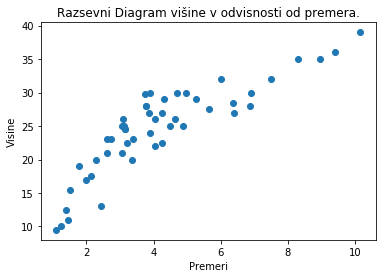

In [178]:
#sns.lmplot(x='premer', y='visina', data=drevo, fit_reg=True)
x=drevo['premer']
y=drevo['visina']
plt.scatter(x,y,)
plt.title('Razsevni Diagram višine v odvisnosti od premera.')
plt.xlabel('Premeri')
plt.ylabel('Visine')

Podatke lahko predtavimo tudi s histogrami:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3AFD50AC8>,
      dtype=object)

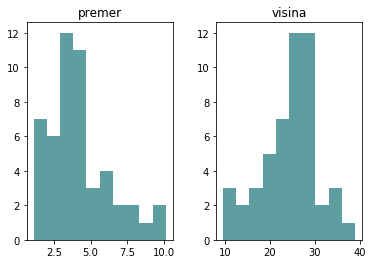

In [179]:
drevo.hist(grid = False, color = 'cadetblue')

## Regresija
Navodilo:
Če je potrebno transformirati eno ali obe spremenljivki,prikažite opisno statistiko in rezultate linearnega regresij-
skega modela (razsevni diagram, diagnostične grafe) na pred in po transformaciji. Utemeljite, zakaj je transformacija podatkov potrebna. Transformacijo ustrezno uporabite tudi za napoved.

Naredili bomo transformacijo spremenljivke "premer" v log2(premer), saj bo tako odvisnost višine od premera še bolj linearna.

Podatke o višinah in o premerih bomo shranili v dva seznama. Tako lahko iteriramo skozi seznam in računamo logaritem za vsako vrednost posebaj. Ustvarimo tudi seznam, ki ga bomo medtem polnili z vrednostmi logartimov premerov.

In [180]:
seznam_visin = drevo['visina'].values.tolist()
seznam_premerov = drevo['premer'].values.tolist()
seznam_premerov_log=[]


Polnjenje seznama logaritmov premerov:

In [181]:
for premer in seznam_premerov:
    seznam_premerov_log.append(math.log(premer, 2))

Seznam z vrednostmi logaritmov je napolnjen. Zdaj bomo seznama "seznam_višin" ter "seznam_premerov_log" pretvorili v DataFrame in združili, da bomo lahko ponovno narisali razsevni diagram ter izpisali Opisno statistiko.

In [182]:
premeri_log_df = pd.DataFrame(seznam_premerov_log, columns =['Logaritmi premerov'])
visine_df = pd.DataFrame(seznam_visin, columns =['Visine'])
visine_premeri_df = pd.concat([premeri_log_df, visine_df], axis=1,ignore_index=False)
premeri_log_df

Logaritmi premerov
0             1.906891
1             0.594549
2             1.201634
3             1.678072
4             2.392317
5             2.906891
6             3.161888
7             2.087463
8             3.053111
9             1.963474
10            1.104337
11            1.959770
12            1.389567
13            0.992768
14            0.545968
15            2.778209
16            0.475085
17            2.283922
18            2.678072
19            1.280956
20            2.104337
21            1.443607
22            1.765535
23            2.014355
24            0.150560
25            2.166715
26            2.498251
27            1.636915
28            2.087463
29            0.823749
30            1.744161
31            2.017922
32            2.786596
33            2.217231
34            1.608809
35            1.608809
36            1.918386
37            2.313246
38            1.914565
39            1.389567
40            1.632268
41            1.944858
42            3.232661
43            3.343408
44            1.655352
45            1.655352
46            2.589763
47            2.235727
48            2.671293
49            0.321928

Razsevni diagram po transformaciji:

Text(0, 0.5, 'Visine(m)')

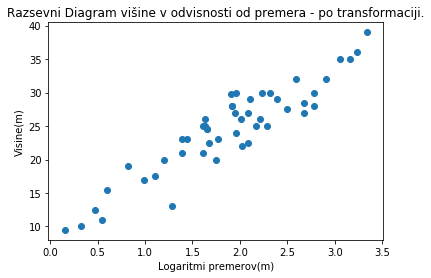

In [183]:
xdf=visine_premeri_df['Logaritmi premerov']
ydf=visine_premeri_df['Visine']
plt.scatter(xdf,ydf)
plt.title('Razsevni Diagram višine v odvisnosti od premera - po transformaciji.')
plt.xlabel('Logaritmi premerov(m)')
plt.ylabel('Visine(m)')

Spodaj so še histogrami po transformaciji:

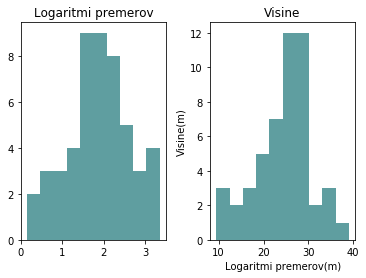

In [184]:
visine_premeri_df.hist(grid = False, color = 'cadetblue')
plt.xlabel('Logaritmi premerov(m)')
plt.ylabel('Visine(m)')
plt.show()

Opazimo, da je razporeditev logaritmov premerov  pri osnovi 2 bolj podobna normalni porazdelitvi kot razporeditev premerov samih.

Izračunajmo še vzorčni koeficient korelacije pred in po transformaciji:

Pred transformacijo:

In [185]:
drevo.corr()

premer    visina
premer  1.000000  0.865035
visina  0.865035  1.000000

Preverimo še ročno:

In [186]:
def pearson_r(x,y):
    n=len(x)
    xp=sum(xi for xi in x)/n
    yp=sum(yi for yi in y)/n
    sx=sum((xi - xp)**2 for xi in x)/(n-1)
    sy=sum((yi - yp)**2 for yi in y)/(n-1)
    cov = sum(xi*yi for (xi,yi) in zip(x,y))
    return (cov - n*xp*yp)/((n-1)*math.sqrt(sx*sy))

In [187]:
r = pearson_r(x, y)
print("Pearsonov koeficient korelacije: {}".format(r))

Pearsonov koeficient korelacije: 0.8650351669773841


Vidimo, da je koeficient pozitiven, kar pomeni, da so drevesa z večjim premerom tudi višja. Vrednost vzorčnega koeficienta je že pred transformacijo blizu 1 (0.86), kar pomeni visoko linearno povezanost premera in višine drevesa oz. da so podatki razporejei vzdolž premice.

Po transformaciji:

In [188]:
visine_premeri_df.corr()

Logaritmi premerov    Visine
Logaritmi premerov            1.000000  0.924249
Visine                        0.924249  1.000000

Zdaj ko imamo izračunana oba koeficienta se zelo lepo vidi, da je odvisnost med višino in premerom še bolj linearna po transformaciji, kot pred transformacijo. Koeficient korelacije (0.924249) po transformaciji je namreč še bližje 1. Ker je po transformaciji koeficient korelacije tako velik sklepam, da med višino in premerom (logaritmom premera) orjaških klekov obstaja funkcijska zveza.

Izpišimo še opisno statistiko po transformaciji:

In [189]:
visine_premeri_df.describe()

Logaritmi premerov     Visine
count           50.000000  50.000000
mean             1.878567  24.636000
std              0.758802   6.622342
min              0.150560   9.500000
25%              1.484907  21.250000
50%              1.931622  25.000000
75%              2.305915  28.875000
max              3.343408  39.000000

Premer vzorcev po transformaciji variira od 0.150560 do 3.343408 s povprečjem 1.878567 in standardnim odklonom 0.758802. Prvi kvartil je pri 1.484907 drugi pri 1.931622 in tretji pri 2.305915. Opazimo, da je standardni odklon več kot polovico manjši, kot preden smo opravili transformacijo, podatki so namreč po transformaciji bolj nabrani okoli povprečne vrednosti (mean).

### Linearni regresijski model
Formirajte linearni regresijski model in preverite njegove predpostavke

Formacija regresijskega modela:

In [190]:
X=visine_premeri_df[['Logaritmi premerov']]
Y=visine_premeri_df[['Visine']]

In [191]:
regresijski_model = LinearRegression()
regresijski_model.fit(X, Y)
regresijski_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Razsevni diagram z regresijsko premico:

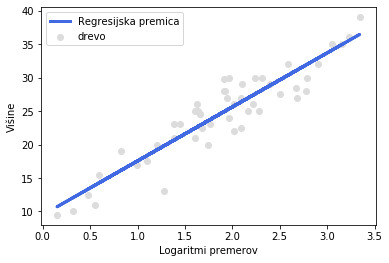

In [192]:
y_predict = regresijski_model.predict(X)
plt.scatter(xdf, ydf, color='gainsboro', label = 'drevo')
plt.plot(xdf, y_predict, color='royalblue',linewidth=3,linestyle='-',label='Regresijska premica')
plt.ylabel('Višine')
plt.xlabel('Logaritmi premerov')
plt.legend()

Spodaj izračunamo oceno naklona in oceno odseka. Oba sta smiselna, vidimo, da če bi premica šla do ordinatne osi bi jo res sekala v pribljižno 8. Tudi naklon izgleda v redu, kajti, ko se poveča vrednost logaritmov premerov iz 1 na 2, se višina res poveča za pribljižno 9. 

In [193]:
ocena_naklona = regresijski_model.intercept_[0]
ocena_odseka = regresijski_model.coef_[0][0]

print("Ocena naklona: " + str(ocena_naklona))
print("Ocena odseka: " + str(ocena_odseka))


Ocena naklona: 9.483003111994174
Ocena odseka: 8.066254662202269


Regresijska premica: Y = 8.066 + 9.483X
Y...višina
X...logaritmi premerov

#### 1.Predpostavka: 
Napake so normalno porazdeljene. Preverili jo bomo s pomočjo grafa normalnosti porazdelitve naključnih napak:

Text(0.5, 0, 'Teoretični kvantili')

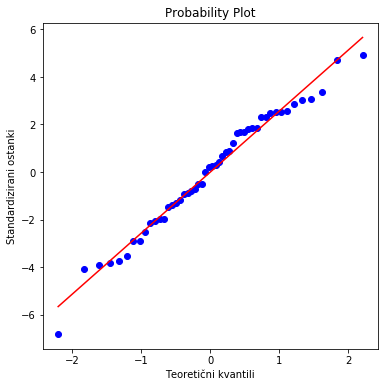

In [194]:
y_predicted = regresijski_model.predict(X)
nov_y_pred=[]
for y_pred in y_predicted:
    nov_y_pred.append(y_pred[0])
ostanki = []
for i in range(0, 50):
   ostanki.append(seznam_visin[i]-y_predicted[i][0])

fig, ax = plt.subplots(figsize=(6,6))
sp.stats.probplot(ostanki, plot=ax,fit=True)
plt.ylabel('Standardizirani ostanki')
plt.xlabel('Teoretični kvantili')

Na y-osi imamo standardizirane ostanke. Ostanek standardiziramo tako, da ga delimo z oceno njegovega standardnega odklona. Na x-osi pa imamo teoretične kvantile. Vidimo, da točke tvorijo premico z manjšimi odstopanji. Tako vemo, da so naključne napake normalno porazdeljene, četrta prepostavka je izpolnjena.

#### 2.Predpostavka:
Napake imajo konstantno varianco (homogenost variance). Preverili jo bomo z grafom homogenosti variance.

Narisali bomo graf korenov standardnih ostankov v odvisnosti od predvidenih vrednosti. Če bomo videli, da variabilnost korenov narašča ali pada s povečanjem predvidenih vrednosti, bomo vedeli, da varianca naključnih napak ni konstantna.

Text(0.5, 0, 'Predvidene višine')

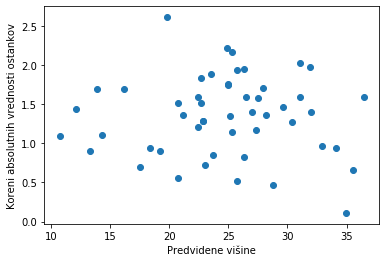

In [195]:
korenjeni_ostanki = []
for ostanek in ostanki:
    korenjeni_ostanki.append(math.sqrt(abs(ostanek)))
plt.scatter(y_predicted, korenjeni_ostanki)
plt.ylabel('Koreni absolutnih vrednosti ostankov')
plt.xlabel('Predvidene višine')

Vidimo, da variabilnost korena standardiziranih ostankov niti ne narašča niti ne pada s povečanjem predvidene višine, tako da je varianca naključnih napak pribljižno konstantna.

#### 3.Predpostavka: 
Vpliv posameznih točk na model. 

Narisali bomo graf Cookove razdalje za vsako meritev.

Na grafu imamo dve točki, meritev 0 in meritev 1, ki imata preveliko Cookovo razdaljo. Pa jo poglejmo.

Najprej rekreiramo naš model za knjižnico statsmodel.api. Z njo je namreč veliko lažje izračunati cookovo razdaljo. 

In [196]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est=model.fit()
infl = est.get_influence()
sm_fr = infl.summary_frame()
cookove_razdalje = sm_fr["cooks_d"]
cookove_seznam=[]

from scipy.stats import f
fisher = f(dfn=2,dfd=50-2).ppf(0.5) 
fisher

for value in cookove_razdalje:
    cookove_seznam.append(value)


C:\Users\benik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Cookove razdalje smo dobili z metodo .summary_frame() iz katere smo izbrali samo stolpec "cooks_d". Vse cookove razdalje smo dodali v tabelo cookove_seznam. Mediano fisherove porazdelitve dobimo z metodo f().ppf(). Narišimo graf:

Text(0, 0.5, 'Cookova Razdalja')

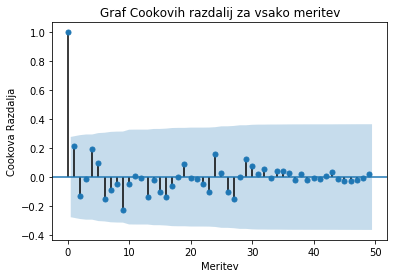

In [197]:
acf = smt.graphics.plot_acf(cookove_seznam, lags=49, alpha=0.05)
plt.title('Graf Cookovih razdalij za vsako meritev')
plt.xlabel('Meritev')
plt.ylabel('Cookova Razdalja')

Preverimo, ali je katera od cookovih razdalij večja od mediane fisherove porazdelitve:

In [198]:
en_je_večji=False
for value in cookove_razdalje:
    cookove_seznam.append(value)
    if value > fisher:
        print(value)
        en_je_večji=True
if(en_je_večji):
    print("Vsaj ena cookova razdalja je večja od mediane Fisherjeve porazdelitve.")
else:
    print("Nobene točke ni treba odstraniti.")

Nobene točke ni treba odstraniti.


Vidimo, da nobena cookova razdalja ni večja od mediane Fisherjeve porazdelitve, torej lahko obdržimo vse točke.

#### 4.Predpostavka: 
Y je linearna funkcija X. Preverili jo bomo s pomočjo grafa za preverjanje linearnosti modela

Spodaj bomo pridobili predvidene vrednosti višin (y_predicted) in od jih odšteli od dejanskih vrednosti višin. Tako bomo dobili ostanke. Če bodo točke na grafu ostankov v odvisnosti od logaritmov premerov raztresene, bo model validen.

Text(0, 0.5, 'Ostanki(m)')

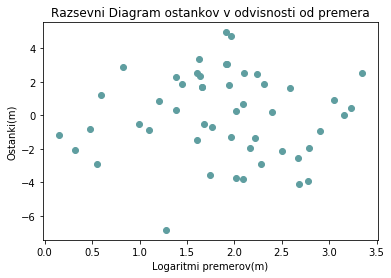

In [199]:
y_predicted = regresijski_model.predict(X)
nov_y_pred=[]
for y_pred in y_predicted:
    nov_y_pred.append(y_pred[0])
ostanki = []
for i in range(0, 50):
   ostanki.append(seznam_visin[i]-y_predicted[i][0])

ostanki_df = pd.DataFrame(ostanki)
plt.scatter(X, ostanki_df,color='cadetblue')

plt.title('Razsevni Diagram ostankov v odvisnosti od premera')
plt.xlabel('Logaritmi premerov(m)')
plt.ylabel('Ostanki(m)')



Zgoraj je graf ostankov v odvisnosti od logaritmov premerov. Ker so točke raztresene na grafu in ne moremo zaznati neke oblike, je model validen.

### Testiranje linearnosti modela
Testiranje linearnosti regresijskega modela in koeficient determinacije

Linearnost bomo preverili z t-testom in koeficientom determinacije.

In [200]:
from scipy.stats import ttest_rel

ttest_pair = ttest_rel(seznam_premerov_log,seznam_visin)
ttest_pair

Ttest_relResult(statistic=-27.145167350824323, pvalue=3.4824703295167752e-31)

In [201]:
deg_free = (len(seznam_premerov_log) + len(seznam_visin) - 2)
deg_free

98

Ničelna hipoteza pravi, da ni razmerja med merjenima spremenljivkama, torej da je koeficient korelacije enak 0. Naša T-vrednost je -27.145167350824323 (na 4 decimalke natančno), naša p-vrednost je 3.4824703295167752 x 10⁻31(10 na minus 31), 98 pa so prostostne stopnje. P-vrednost predstavlja verjetnost, da je  koeficient korelacije v vzorcu enak 0. Da lahko ničelno hipotezo ovržemo, mora biti p-vrednost manjša od stopnje značilnosti (alfa), za katero bomo vzeli vrednost 0,05. Vidimo, da je p-vrednost veliko manjša od dane stopnje značilnosti. Ničelno domnevo lahko zavržemo, model je validen. Verjamemo lahko, da je med premeri in višinami neko razmerje.

Koeficient determinacije:
Koeficient determinacije se izračuna kot kvadrat vzorčnega koeficienta korelacije (ki je v našem primeru 0.924249).

In [202]:
0.924249**2

0.854236214001

To pa pomeni, da smo 85% variabilnosti višine pojasnili s premeri (ta linearni regresijski model pojasnjuje 75% variabilnosti višin).

### Regresijska premica
Intervala zaupanja za naklon in odsek regresijske premice

Regresijsko premico sem narisal že zgoraj. Zdaj izračunajmo intervale zaupanja za odsek in naklon regresijske premice. Privzeto metoda računa 95% intervale zaupanja:

In [203]:
est.conf_int()

0          1
const               7.526606  11.439401
Logaritmi premerov  7.099266   9.033244

Zgornji podatki nam povejo, da je 95% interval zaupanja za odsek enak [7.526606, 11.439401], 95% interval zaupanja za naklon premice pa je enak [7.099266, 9.033244].

## Intervali zaupanja za napoved
Če napovedujemo $Y$ na podlagi $X=x_0$, dobimo interval zaupanja
$$ [y_n - \Delta, y_n + \Delta],
kjer je $y_n = a_1 + b_1 x_0$

Zanima nas v kakšnih merah se z gotovostjo 95% nahajajo višine orjaških klekov z naslednjimi premeri: 2m, 2.5m, 3m

#### 2 metra:

In [204]:
a1 = 8.066254662202269
b1 = 9.483003111994174

from scipy.stats import t
beta = 0.95
x_0 = 2
y_n = a1  + b1*x_0
#varianca napak
S2 = sum((yi - (a1 + b1*xi))**2 for (xi,yi) in zip(x,y))/(n-2)
c = t.ppf((1+beta)/2,n-2)
delta = c*math.sqrt(S2)*math.sqrt(1+1/n+(x_0 - xp)**2/((n-1)*sx2))
print("Premer: {}m".format(x_0))
print("Napoved: {:.2f}".format(y_n))
print("Interval zaupanja za napoved višine pri premeru 2 je [{:.2f},{:.2f}]".format(y_n - delta, y_n + delta))

Premer: 2m
Napoved: 27.03
Interval zaupanja za napoved višine pri premeru 2 je [-29.86,83.92]


#### 2,5 metra

In [205]:
from scipy.stats import t
beta = 0.95
x_0 = 2.5
y_n = a1  + b1*x_0
#varianca napak
S2 = sum((yi - (a1 + b1*xi))**2 for (xi,yi) in zip(x,y))/(n-2)
c = t.ppf((1+beta)/2,n-2)
delta = c*math.sqrt(S2)*math.sqrt(1+1/n+(x_0 - xp)**2/((n-1)*sx2))
print("Premer: {}m".format(x_0))
print("Napoved: {:.2f}".format(y_n))
print("Interval zaupanja za napoved je [{:.2f},{:.2f}]".format(y_n - delta, y_n + delta))

Premer: 2.5m
Napoved: 31.77
Interval zaupanja za napoved je [-25.48,89.03]


#### 3 metre:

In [206]:
from scipy.stats import t
beta = 0.95
x_0 = 3
y_n = a1  + b1*x_0
#varianca napak
S2 = sum((yi - (a1 + b1*xi))**2 for (xi,yi) in zip(x,y))/(n-2)
c = t.ppf((1+beta)/2,n-2)
delta = c*math.sqrt(S2)*math.sqrt(1+1/n+(x_0 - xp)**2/((n-1)*sx2))
print("Premer: {}m".format(x_0))
print("Napoved: {:.2f}".format(y_n))
print("Interval zaupanja za napoved je [{:.2f},{:.2f}]".format(y_n - delta, y_n + delta))

Premer: 3m
Napoved: 36.52
Interval zaupanja za napoved je [-21.59,94.62]
